<h1>Task 1<h1>
<h2>Part 1<h2>

**Derivation of the Logistic Regression objective function**

logistic Regression Function: $\hat{y} = \sigma(z) = \frac{1}{1 + e^{-z}}$

where

$z = w^{T}x + b$, $y_i \in \{0, 1\}$

---
Step 1: Find the Likelyhood (Bernoulli Distribution)

$L(\hat{y}) = \hat{y}^{y}(1 - \hat{y})^{1 - y}$

Step 2: Find the Log Likelyhood (LL)

$LL(\hat{y_i}, y_i) = {y_ilog(\hat{y_i}) + (1 - y_i)log(1 - \hat{y_i})}$

Step 3: Define the objective function

$J(w,b) = \frac{1}{n}\sum^i_{i=1}LL(\hat{y_i}, y_i)$

Maximum A Posteriori (MAP):\
https://web.engr.oregonstate.edu/~xfern/classes/cs534-18/Logistic-Regression-3-updated.pdf

In our previous derivation of the objective function, our Maximum Likelyhood Estimation is the Log likelyhood, but using the MAP allows us to combine the MAP with a regularization parameter based on the prior of another distribution. The variance on the prior helps control overfitting, making it a viable improvement.

<h2>Part 2

I want to create a logistic regression model that can classify wether someone has diabetes based on clinical features such as Age, blood pressure, glucose levels, and BMI.

Logistic regression is the best choice because given the input parameters, it will provide a probabilistic output based on the sigmoid function. If we used a perceptron, our model would only improve based on the errors in our predictions and would only converge if the data is linearly seperable. Logistic regression minimizes log loss using gradient descent and considers the entire dataset. It also allows us to implement regularization to prevent overfitting.

Source (Machine learning from Data, taught by Prof. Malik at RPI):
https://amlbook.com/

<h2>Part 3

In our example dataset every patient has an $x$ vector. Our $y$ is wether they have diabetes $y = 1$ or not $y = 0$.

Assumptions:
- By summing the log-likelyhood we assume that the diagnosis of one patient does not affect the other.
- Each patient has the same amount of data.
- If values are missing we filling them according to a specific criteria.
- We assume there are only 2 possible outcomes based on the Bernoulli distribution.
- Each feature contributes to the risk independently and additively, i.e. each feature cannot be perfectly predicted by the other features and the relationship between the features and the "risk score" is linear.


<h1>Task 2<h1>
<h2>Part 1<h2>


Dataset: Exam Score Prediction Dataset\
Link: https://www.kaggle.com/datasets/kundanbedmutha/exam-score-prediction-dataset

Features: 13




In [266]:
from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Mount Google Drive at /content/drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [267]:
# Read the contents
path = '/content/drive/MyDrive/datasets/Exam_Score_Prediction.csv'

df = pd.read_csv(path)

# Verify the load
print(df.columns)
df.head()

Index(['student_id', 'age', 'gender', 'course', 'study_hours',
       'class_attendance', 'internet_access', 'sleep_hours', 'sleep_quality',
       'study_method', 'facility_rating', 'exam_difficulty', 'exam_score'],
      dtype='object')


,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


In [268]:
# Data Size
print(df.shape)

# Amount of null values
df.isna().sum()

(20000, 13)


,0
student_id,0
age,0
gender,0
course,0
study_hours,0
class_attendance,0
internet_access,0
sleep_hours,0
sleep_quality,0
study_method,0


In [269]:
# general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        20000 non-null  int64  
 1   age               20000 non-null  int64  
 2   gender            20000 non-null  object 
 3   course            20000 non-null  object 
 4   study_hours       20000 non-null  float64
 5   class_attendance  20000 non-null  float64
 6   internet_access   20000 non-null  object 
 7   sleep_hours       20000 non-null  float64
 8   sleep_quality     20000 non-null  object 
 9   study_method      20000 non-null  object 
 10  facility_rating   20000 non-null  object 
 11  exam_difficulty   20000 non-null  object 
 12  exam_score        20000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 2.0+ MB


In [270]:
# statistics of the dataset (numeric columns)
df.describe()

,student_id,age,study_hours,class_attendance,sleep_hours,exam_score
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000
mean,10000.504600,20.473300,4.007604,70.017365,7.00856,62.513225
std,5773.654959,2.284458,2.308313,17.282262,1.73209,18.908491
min,1.000000,17.000000,0.080000,40.600000,4.10000,19.599000
25%,5000.750000,18.000000,2.000000,55.100000,5.50000,48.800000
50%,10000.500000,20.000000,4.040000,69.900000,7.00000,62.600000
75%,15000.250000,22.000000,6.000000,85.000000,8.50000,76.300000
max,20001.000000,24.000000,7.910000,99.400000,9.90000,100.000000


In [271]:
# statistics of the dataset (categorical columns)
df.describe(include=['O'])

# count: amount of non-null row entries in a column
# unique: amount of unique categories
# top: most frequent category
# freq: amount of times the most frequent category appeared

,gender,course,internet_access,sleep_quality,study_method,facility_rating,exam_difficulty
count,20000,20000,20000,20000,20000,20000,20000
unique,3,7,2,3,5,3,3
top,other,bca,yes,average,self-study,medium,moderate
freq,6726,2902,16988,6694,4079,6760,9878


In [272]:
# is the data imbalanced?
# df.exam_score.value_counts(normalize=True) #normalizes the result
results = pd.cut(df['exam_score'],
                 bins=[-float('inf'), 59, float('inf')],
                 labels=['Below 60', '60 and Above']).value_counts(normalize=True)

print(results)

exam_score
60 and Above    0.5705
Below 60        0.4295
Name: proportion, dtype: float64


''

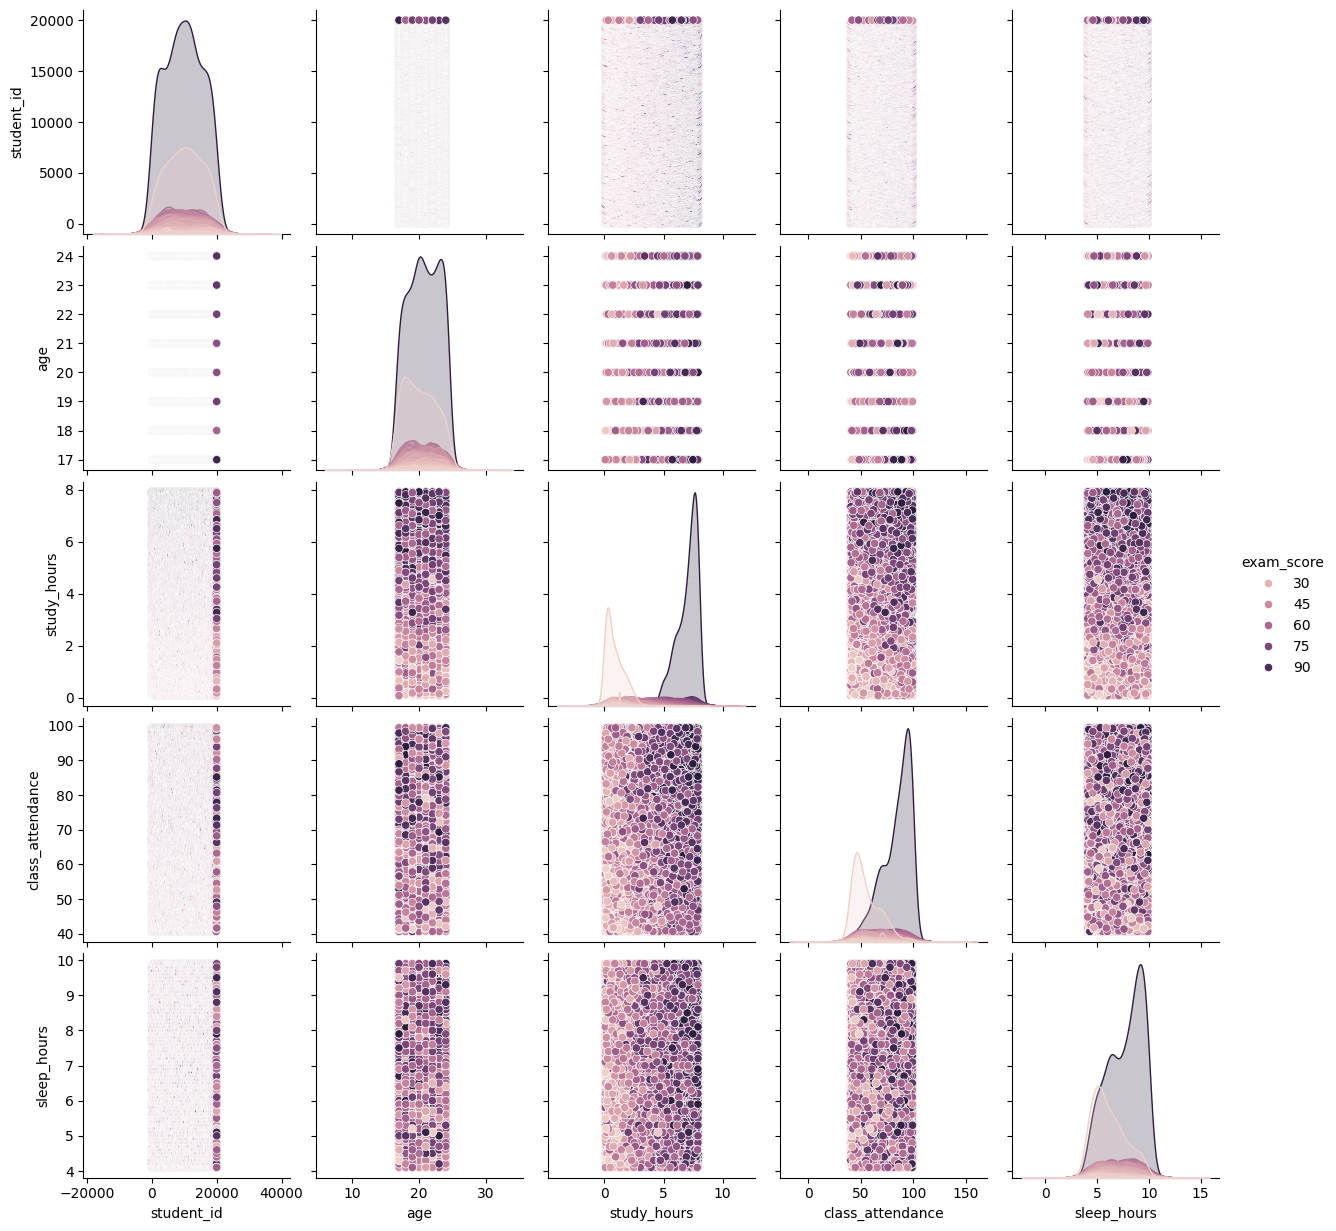

In [273]:
# ploting pairwise relationships in the dataset
sns.pairplot(df, hue='exam_score')
,

''

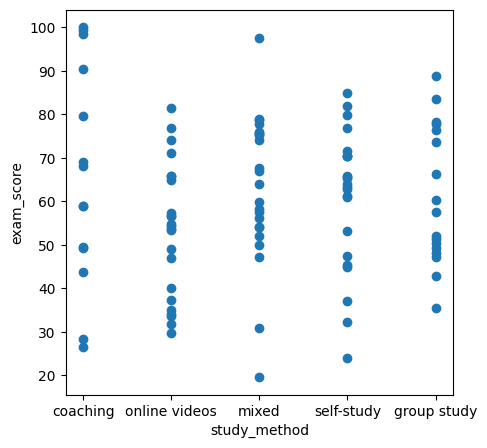

In [274]:
# useful for identifying relationship (i.e. correlation) between two parameters
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(df[0:100].study_method, df[0:100].exam_score)
ax.set_xlabel('study_method')
ax.set_ylabel('exam_score')
,

''

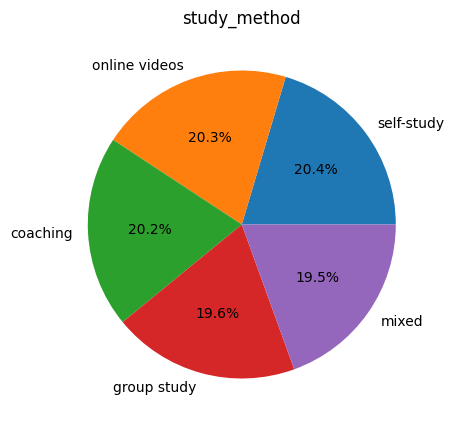

In [275]:
# useful for depicting proportional data with each slice of pie representing a specific category
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(x=df.study_method.value_counts(),
       labels=df.study_method.value_counts().index,
       autopct='%1.1f%%')
ax.set_title('study_method')
,

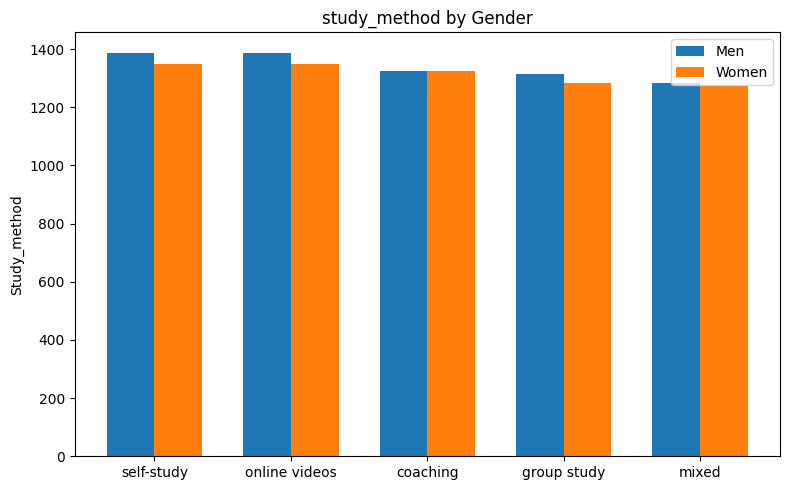

In [276]:
# useful for comparing things between different groups or to track changes over time
labels = df.study_method.value_counts().index
men_study_method = df.loc[df.gender=='male'].study_method.value_counts()
women_study_method = df.loc[df.gender=='female'].study_method.value_counts()

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8,5))
rects1 = ax.bar(x - width/2, men_study_method, width, label='Men')
rects2 = ax.bar(x + width/2, women_study_method, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Study_method')
ax.set_title('study_method by Gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

''

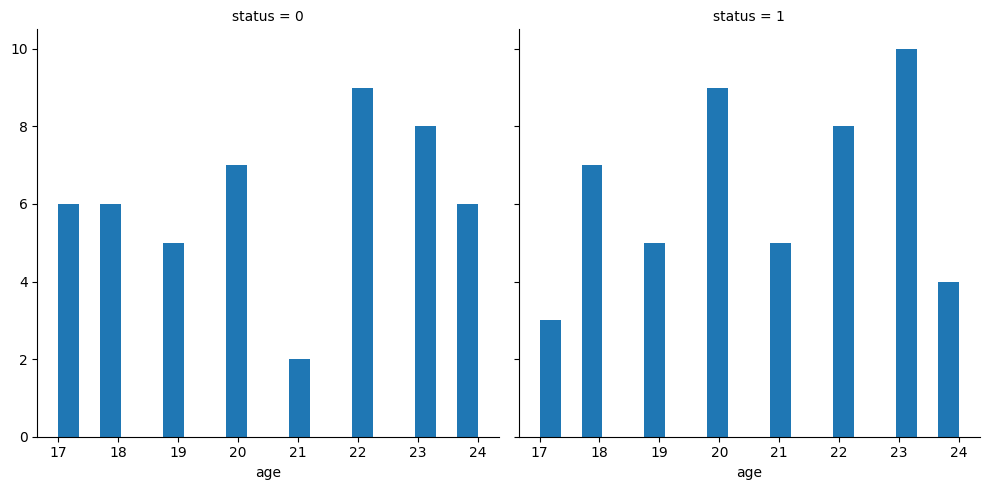

In [279]:
# Add a classification column
df['status'] = pd.cut(df['exam_score'],
                      bins=[-float('inf'), 59, float('inf')],
                      labels=[0, 1]).astype(int)

# useful for visualizing the distribution of the data
g = sns.FacetGrid(df[0:100], col='status', height=5)
g.map(plt.hist, 'age', bins=20)
,

# Feature Engineering and Encoding

In [280]:
print(df.groupby('gender').size())

gender
female    6579
male      6695
other     6726
dtype: int64


In [281]:
# perform label encoding for internet_access column
df.internet_access = df.internet_access.map({ 'no': 0, 'yes': 1})

In [282]:
# one hot encoding of Embarked and Title columns
for column in ['gender', 'course', 'sleep_quality', 'study_method', 'facility_rating', 'exam_difficulty']:
    dummies = pd.get_dummies(df[column], prefix=column, drop_first=True)
    df = pd.concat([df, dummies], axis=1).drop([column], axis=1)


# ADDED Dropfirst = True
# Purpose: Reduce multicolinearity on categories implying one another.

''

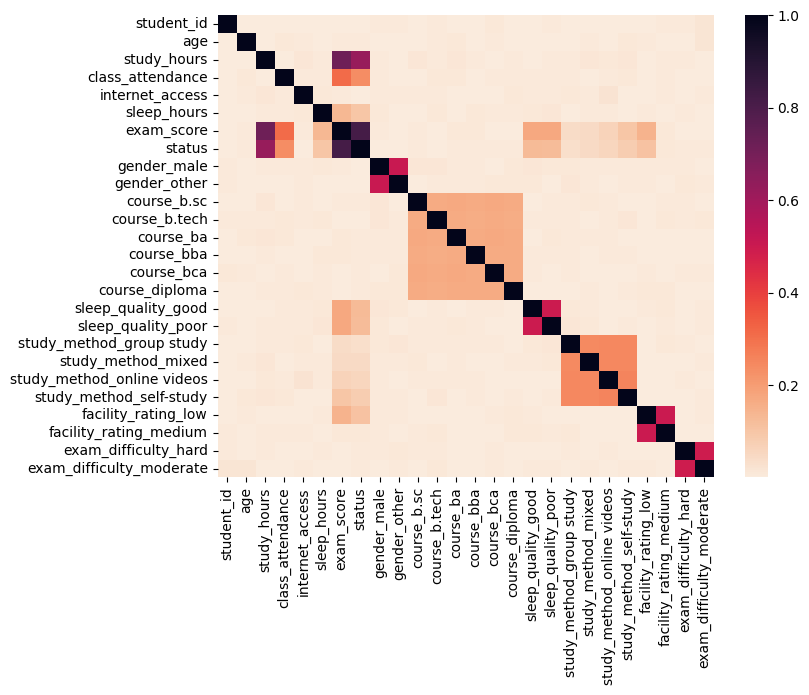

In [283]:
# Plot
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(df.corr().abs(),annot=False, ax=ax, cmap='rocket_r')
,

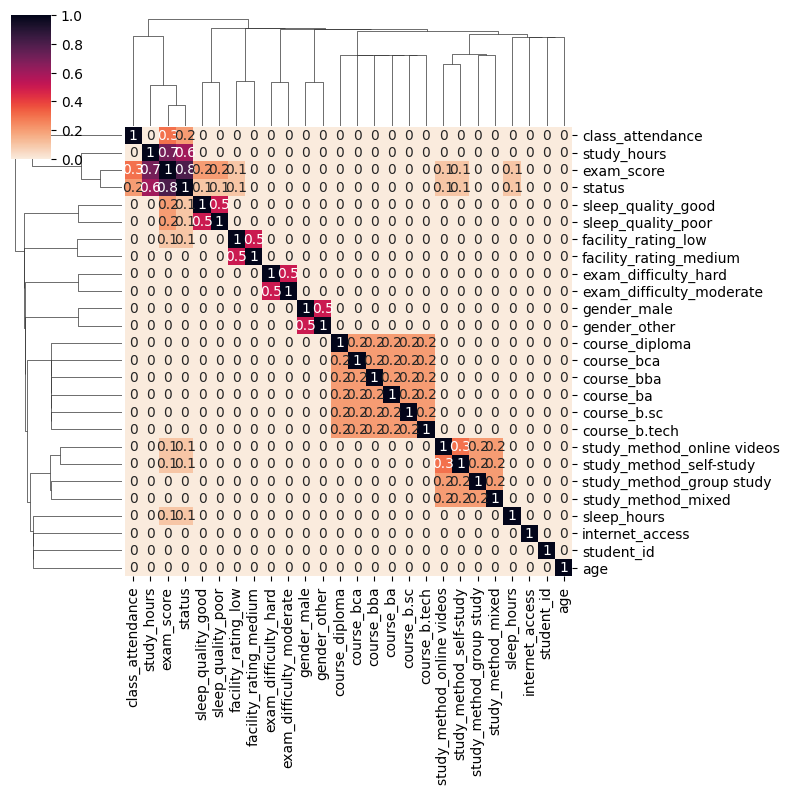

In [284]:
# Heatmap with clustering
g = sns.clustermap(df.corr(numeric_only=True).abs().round(1),
                   annot=True,
                   cmap='rocket_r',
                   figsize=(8, 8))

plt.show()

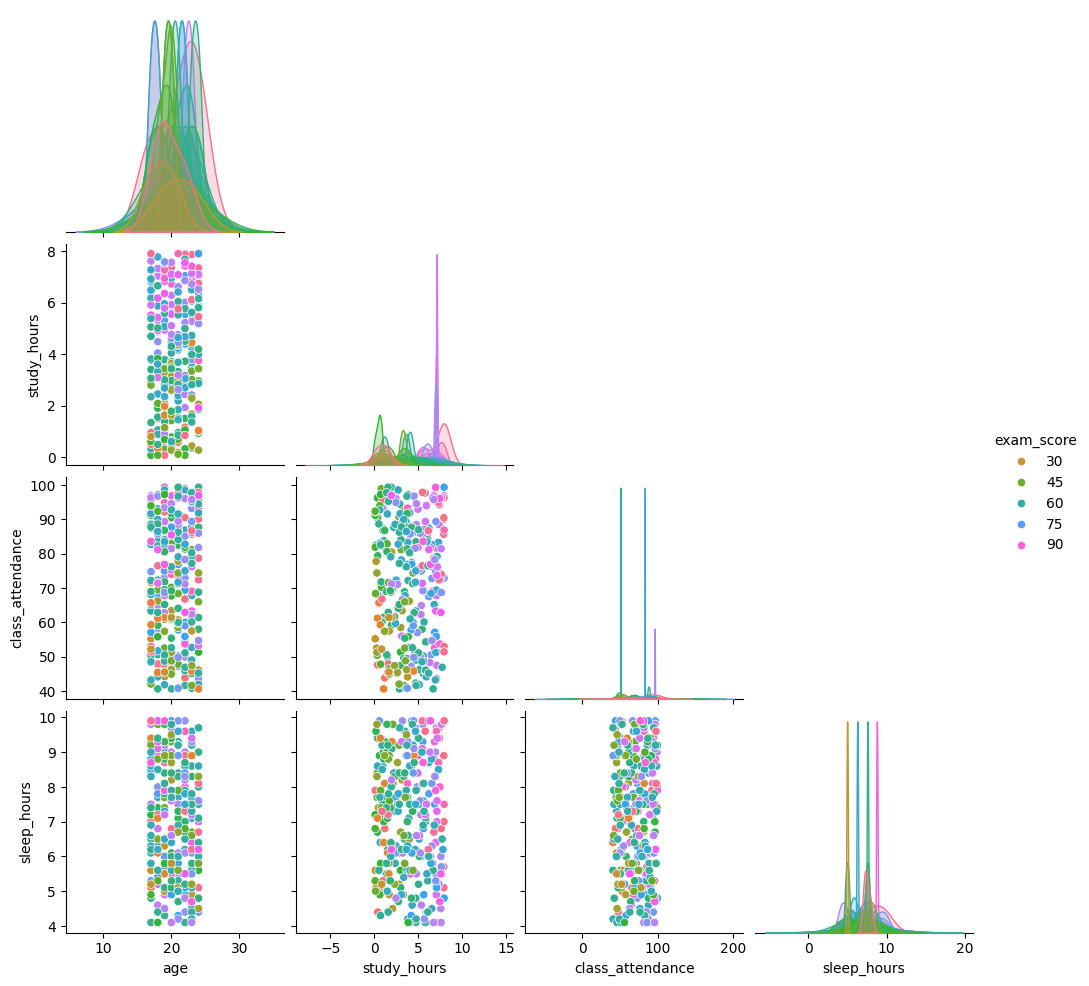

In [285]:
# 1. Select the features you want to visualize
features = ['age', 'study_hours', 'class_attendance', 'sleep_hours', 'exam_score']

# 2. Create the pairplot
# diag_kind='kde' creates the smooth density curves on the diagonal
# corner=True removes the redundant upper triangle of the matrix
sns.pairplot(df[features].sample(300),
             hue='exam_score',
             diag_kind='kde',
             palette='husl',
             corner=True)

plt.show()

In [286]:
# feature correlation with target variable
df.corr(numeric_only=True)['exam_score'].sort_values(ascending=False)

,exam_score
exam_score,1.000000
status,0.817599
study_hours,0.717788
class_attendance,0.308850
sleep_quality_good,0.172049
sleep_hours,0.133222
study_method_mixed,0.044980
facility_rating_medium,0.010613
course_bba,0.008920
age,0.006522


In [287]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 1. Drop the columns that are definitely not features (ID and Target)
# Also drop 'exam_score' if it's still in there, as it's perfectly correlated with 'status'
X = df.drop(columns=['student_id', 'exam_score', 'status'], errors='ignore')

# 2. Select ALL numeric columns, including the 0/1 dummies (bool and uint8)
X_numeric = X.select_dtypes(exclude=['object'])
X_numeric = X_numeric.astype(float)

# 3. Add the constant
X_numeric['intercept'] = 1

# 4. Calculate VIF
vif_df = pd.DataFrame()
vif_df["feature"] = X_numeric.columns
vif_df["VIF"] = [variance_inflation_factor(X_numeric.values, i) for i in range(X_numeric.shape[1])]

print(vif_df[vif_df['feature'] != 'intercept'].sort_values('VIF', ascending=False))

                       feature       VIF
11                  course_bca  1.722205
9                    course_ba  1.720921
7                  course_b.sc  1.718045
10                  course_bba  1.709301
12              course_diploma  1.707037
8                course_b.tech  1.702327
18     study_method_self-study  1.601815
17  study_method_online videos  1.600724
15    study_method_group study  1.586046
16          study_method_mixed  1.583229
5                  gender_male  1.344261
6                 gender_other  1.343892
20      facility_rating_medium  1.340781
19         facility_rating_low  1.340484
13          sleep_quality_good  1.331591
14          sleep_quality_poor  1.331567
22    exam_difficulty_moderate  1.321322
21        exam_difficulty_hard  1.321097
1                  study_hours  1.001245
3              internet_access  1.001127
4                  sleep_hours  1.000901
0                          age  1.000824
2             class_attendance  1.000803


Our Multicolinearity is very low, with all VIFs falling below the common threshold of 5. Each feature mostly adds independant information and we have little redundancy!

If we had 2 features that were highly correlated, we would drop the one that has a lower correlation with the target variable or combine them both into 1 feature.

# Partitioning The Data

In [288]:
# Split the data
X = df.drop(columns=['student_id', 'exam_score', 'status'])
y = df['status']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = np.asarray(X_train, dtype=np.float64)
y_train = np.asarray(y_train, dtype=np.float64)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(16000, 23) (4000, 23)
(16000,) (4000,)


# Feature Scaling

In [289]:
scaler = StandardScaler()
# Fit only on training data to avoid leaking info from the test set
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


# Logistic Regression Implementation

In [290]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def log_likelyhood(y, y_hat):

  # prevent y_hat = 0, which causes issues with log
  esp = 1e-11
  y_hat = np.clip(y_hat, esp, 1 - esp)

  return -(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)).mean()

# Parameters
n, d = X_train.shape
w = np.zeros(d)
b = 0.0

def logistic_regression_batch(w, b, X_train, y_train, ita=0.01, epochs=1000):
  n = len(X_train)

  for epoch in range(epochs + 1):
    z = X_train @ w + b
    y_hat = sigmoid(z)

    # binary cross entropy
    J_wb = log_likelyhood(y_train, y_hat)

    # Calculate gradients
    dz = y_hat - y_train
    dw = (X_train.T @ dz) / n
    db = dz.mean()

    w -= ita * dw
    b -= ita * db

    if epoch % 100 == 0:
      print(f'Epoch: {epoch}, Loss: {J_wb}')

  return w, b

w, b = logistic_regression_batch(w, b, X_train, y_train)

# Test performance
z = X_test @ w + b
pred = sigmoid(z)

print(f'Accuracy: {(pred.round().astype(int) == y_test).mean() * 100:.2f}%')

Epoch: 0, Loss: 0.6931471805599454
Epoch: 100, Loss: 0.5914105052659616
Epoch: 200, Loss: 0.5285545559313805
Epoch: 300, Loss: 0.4874595803185468
Epoch: 400, Loss: 0.45906872763370515
Epoch: 500, Loss: 0.43852515944560777
Epoch: 600, Loss: 0.4230913221921801
Epoch: 700, Loss: 0.4111385929476268
Epoch: 800, Loss: 0.40164921976402157
Epoch: 900, Loss: 0.39395943262700756
Epoch: 1000, Loss: 0.38762015846030284
Accuracy: 84.50%


#  Mini Batch and Stochastic Gradient Descent

In [291]:
# reset w and b
w = np.zeros(d)
b = 0.0

def logistic_regression_mini_batch(w, b, X_train, y_train, ita=0.001, epochs=50, batch_size=32):
  n = len(X_train)

  for epoch in range(epochs + 1):
    # Take a random subset of data
    indices = np.random.permutation(n)
    X_shuffled = X_train[indices]
    y_shuffled = y_train[indices]

    # Loop through the data in chuncks
    for i in range(0, n, batch_size):

      X_batch = X_shuffled[i : i + batch_size]
      y_batch = y_shuffled[i : i + batch_size]

      # predict
      z = X_batch @ w + b
      y_hat = sigmoid(z)

      # Calculate gradients
      dz = y_hat - y_batch
      dw = (X_batch.T @ dz) / len(y_batch)
      db = dz.mean()

      w -= ita * dw
      b -= ita * db

    if epoch % 10 == 0:
        full_y_hat = sigmoid(X_train @ w + b)
        avg_loss = log_likelyhood(y_train, full_y_hat)
        print(f'Epoch: {epoch}, Avg Loss: {avg_loss}')

  return w, b

w, b = logistic_regression_mini_batch(w, b, X_train, y_train)

# Test performance
z = X_test @ w + b
pred = sigmoid(z)

print(f'Accuracy: {(pred.round().astype(int) == y_test).mean() * 100:.2f}%')


Epoch: 0, Avg Loss: 0.6359498494468296
Epoch: 10, Avg Loss: 0.43035321518963465
Epoch: 20, Avg Loss: 0.3848880590064605
Epoch: 30, Avg Loss: 0.3664807722958603
Epoch: 40, Avg Loss: 0.356912213388973
Epoch: 50, Avg Loss: 0.35123549956428723
Accuracy: 84.78%


In [292]:
# reset w and b
w = np.zeros(d)
b = 0.0

def logistic_regression_stochastic(w, b, X_train, y_train, ita=0.001, epochs=5):
  n = len(X_train)

  for epoch in range(epochs + 1):
    # Take a random subset of data
    indices = np.random.permutation(n)

    # Loop through one point at a time
    for i in indices:
      X_val = X_train[i]
      y_val = y_train[i]

      # predict
      z = np.dot(X_val, w) + b
      y_hat = sigmoid(z)

      # Calculate gradients
      dz = y_hat - y_val
      dw = X_val * dz
      db = dz

      w -= ita * dw
      b -= ita * db

    # Calculate total loss once at the end of the epoch
    if epoch % 1 == 0:
        full_y_hat = sigmoid(X_train @ w + b)
        avg_loss = log_likelyhood(y_train, full_y_hat)
        print(f'Epoch: {epoch}, Avg Loss: {avg_loss}')

  return w, b

w, b = logistic_regression_stochastic(w, b, X_train, y_train) # 16,000 * 10 = 160,000 iterations

# Test performance
z = X_test @ w + b
pred = sigmoid(z)

print(f'Accuracy: {(pred.round().astype(int) == y_test).mean() * 100:.2f}%')

Epoch: 0, Avg Loss: 0.36574877531893274
Epoch: 1, Avg Loss: 0.3469733978955322
Epoch: 2, Avg Loss: 0.3417024780852791
Epoch: 3, Avg Loss: 0.33989661999917203
Epoch: 4, Avg Loss: 0.3387948633946218
Epoch: 5, Avg Loss: 0.3384179777123539
Accuracy: 85.02%


# Convergence Properties

Batch: Uses the entire dataset for every update to provide smooth and direct path to the minimum. It is stable but computationally expensive.

Mini-Batch: The balanced middle ground. It uses small groups to reduce noise while maintaining speed. This offers stable convergence and low computational expense.

Stochastic: Updates per sample, resulting in a jittery and erratic path. This "noise" helps escape local minima but never perfectly settles.

# Improvements

In [293]:
def metrics_calc(pred, y_test):
  # Convert probabilities to 0 or 1
  y_pred = (pred >= 0.5).astype(int)

  # Calculate outcomes
  tp = np.sum((y_pred == 1) & (y_test == 1)) # True Positives
  tn = np.sum((y_pred == 0) & (y_test == 0)) # True Negatives
  fp = np.sum((y_pred == 1) & (y_test == 0)) # False Positives
  fn = np.sum((y_pred == 0) & (y_test == 1)) # False Negatives

  precision = tp / (tp + fp) if (tp + fp) > 0 else 0
  recall = tp / (tp + fn) if (tp + fn) > 0 else 0
  f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

  print(f"Precision: {precision:.2f}")
  print(f"Recall:    {recall:.2f}")
  print(f"F1 Score:  {f1:.2f}")


# reset w and b
w = np.zeros(d)
b = 0.0

def logistic_regression_momentum(w, b, X, y, ita=0.001, gamma=0.9, epochs=700):
    n = len(y)
    # Initialize velocities to zero
    v_w = np.zeros_like(w)
    v_b = 0.0

    for epoch in range(epochs + 1):
        z = X @ w + b
        y_hat = sigmoid(z)
        dz = y_hat - y
        dw = (X.T @ dz) / n
        db = dz.mean()

        # binary cross entropy
        J_wb = log_likelyhood(y_train, y_hat)

        # Update velocity
        v_w = gamma * v_w + ita * dw         # vt = γvt−1 + η∇θJ(θ) from the paper
        v_b = gamma * v_b + ita * db

        # Update weights using velocity
        w -= v_w
        b -= v_b

        if epoch % 40 == 0:
          print(f'Epoch: {epoch}, Loss: {J_wb}')

    return w, b

w, b = logistic_regression_momentum(w, b, X_train, y_train)

# Test performance
z = X_test @ w + b
pred = sigmoid(z)

print(f'Accuracy: {(pred.round().astype(int) == y_test).mean() * 100:.2f}%')

metrics_calc(pred, y_test)

Epoch: 0, Loss: 0.6931471805599454
Epoch: 40, Loss: 0.6553372484697254
Epoch: 80, Loss: 0.6146615548401794
Epoch: 120, Loss: 0.5813317239702744
Epoch: 160, Loss: 0.5539047922533261
Epoch: 200, Loss: 0.5311129364763195
Epoch: 240, Loss: 0.5119797642641423
Epoch: 280, Loss: 0.49575861576204
Epoch: 320, Loss: 0.4818773909497915
Epoch: 360, Loss: 0.4698950965527193
Epoch: 400, Loss: 0.45946901595843354
Epoch: 440, Loss: 0.4503303549150428
Epoch: 480, Loss: 0.4422662845222668
Epoch: 520, Loss: 0.4351066908733516
Epoch: 560, Loss: 0.4287143518662914
Epoch: 600, Loss: 0.4229776045940197
Epoch: 640, Loss: 0.41780482774390665
Epoch: 680, Loss: 0.4131202540339044
Accuracy: 84.33%
Precision: 0.86
Recall:    0.86
F1 Score:  0.86


In [294]:
# reset w and b
w = np.zeros(d)
b = 0.0

def logistic_regression_rmsprop(w, b, X, y, ita=0.001, gamma=0.9, eps=1e-8, epochs=2000):
    n = len(y)
    # Cache for squared gradients
    s_w = np.zeros_like(w)
    s_b = 0.0

    for epoch in range(epochs + 1):
        z = X @ w + b
        y_hat = sigmoid(z)
        dz = y_hat - y
        dw = (X.T @ dz) / n
        db = dz.mean()

        # binary cross entropy
        J_wb = log_likelyhood(y_train, y_hat)

        # Update squared gradient cache
        s_w = gamma * s_w + (1 - gamma) * (dw**2) # E[g^2]_t = gamma * E[g^2]_t−1 + (1 - gamma)* g^2
        s_b = gamma * s_b + (1 - gamma) * (db**2)

        # Update weights: ita / sqrt(E[g^2]_t + epsilon)
        w -= (ita / (np.sqrt(s_w) + eps)) * dw
        b -= (ita / (np.sqrt(s_b) + eps)) * db

        if epoch % 100 == 0:
          print(f'Epoch: {epoch}, Loss: {J_wb}')

    return w, b

w, b = logistic_regression_rmsprop(w, b, X_train, y_train)

# Test performance
z = X_test @ w + b
pred = sigmoid(z)

print(f'Accuracy: {(pred.round().astype(int) == y_test).mean() * 100:.2f}%')

metrics_calc(pred, y_test)

Epoch: 0, Loss: 0.6931471805599454
Epoch: 100, Loss: 0.6198861141680404
Epoch: 200, Loss: 0.5730935011251597
Epoch: 300, Loss: 0.5384673288117859
Epoch: 400, Loss: 0.5110275895776758
Epoch: 500, Loss: 0.487820555996392
Epoch: 600, Loss: 0.467917142013388
Epoch: 700, Loss: 0.45050162795985854
Epoch: 800, Loss: 0.434806572800606
Epoch: 900, Loss: 0.4207057370417212
Epoch: 1000, Loss: 0.4080969552243664
Epoch: 1100, Loss: 0.3968783011714747
Epoch: 1200, Loss: 0.38694947106921074
Epoch: 1300, Loss: 0.37821349307738006
Epoch: 1400, Loss: 0.37057761683058127
Epoch: 1500, Loss: 0.363954016098926
Epoch: 1600, Loss: 0.35826007428162165
Epoch: 1700, Loss: 0.3534189576445875
Epoch: 1800, Loss: 0.349359259506325
Epoch: 1900, Loss: 0.34601508931143793
Epoch: 2000, Loss: 0.3433255540083875
Accuracy: 84.75%
Precision: 0.86
Recall:    0.87
F1 Score:  0.87


In [295]:
# reset w and b
w = np.zeros(d)
b = 0.0

def logistic_regression_adam(w, b, X, y, ita=0.01, beta1=0.9, beta2=0.999, eps=1e-8, epochs=1000):
    n = len(y)
    v_w, v_b = np.zeros_like(w), 0.0 # Momentum terms
    s_w, s_b = np.zeros_like(w), 0.0 # RMSProp terms

    for t in range(1, epochs + 1):
        z = X @ w + b
        y_hat = sigmoid(z)
        dz = y_hat - y
        dw = (X.T @ dz) / n
        db = dz.mean()

        # binary cross entropy
        J_wb = log_likelyhood(y_train, y_hat)

        # 1. Update Momentum
        v_w = beta1 * v_w + (1 - beta1) * dw
        v_b = beta1 * v_b + (1 - beta1) * db

        # 2. Update RMSProp cache
        s_w = beta2 * s_w + (1 - beta2) * (dw**2)
        s_b = beta2 * s_b + (1 - beta2) * (db**2)

        # 3. Bias Correction
        v_w_corr = v_w / (1 - beta1**t)
        v_b_corr = v_b / (1 - beta1**t)
        s_w_corr = s_w / (1 - beta2**t)
        s_b_corr = s_b / (1 - beta2**t)

        # 4. Final Update
        w -= (ita * v_w_corr) / (np.sqrt(s_w_corr) + eps)
        b -= (ita * v_b_corr) / (np.sqrt(s_b_corr) + eps)

        if t % 50 == 0:
          print(f'Epoch: {t}, Loss: {J_wb}')

    return w, b

w, b = logistic_regression_adam(w, b, X_train, y_train)

# Test performance
z = X_test @ w + b
pred = sigmoid(z)

print(f'Accuracy: {(pred.round().astype(int) == y_test).mean() * 100:.2f}%')

metrics_calc(pred, y_test)

Epoch: 50, Loss: 0.49769655806959323
Epoch: 100, Loss: 0.4268618626304336
Epoch: 150, Loss: 0.3899472200846397
Epoch: 200, Loss: 0.3693333417669442
Epoch: 250, Loss: 0.35727543060429606
Epoch: 300, Loss: 0.3499775434979525
Epoch: 350, Loss: 0.34545881681841445
Epoch: 400, Loss: 0.34262216867952117
Epoch: 450, Loss: 0.3408294656684774
Epoch: 500, Loss: 0.33969520353879823
Epoch: 550, Loss: 0.3389799286577726
Epoch: 600, Loss: 0.33853203721580555
Epoch: 650, Loss: 0.33825442209300177
Epoch: 700, Loss: 0.3380845591769558
Epoch: 750, Loss: 0.33798220702328613
Epoch: 800, Loss: 0.33792160158948636
Epoch: 850, Loss: 0.33788640412183707
Epoch: 900, Loss: 0.33786638949307146
Epoch: 950, Loss: 0.337855263413629
Epoch: 1000, Loss: 0.33784922559540237
Accuracy: 85.00%
Precision: 0.86
Recall:    0.87
F1 Score:  0.87


# Hyperparameter Tuning

I manually tuned my parameters. When the binary cross entropy calculation was showing erratic results, I increased epochs and lowered the learning rate. If I saw a continual improvement after lowing the learning rate, I would increase epochs until changes were negligable. I couldn't get better then 85% accuracy with any of the methods. The data was of high quality and has been scaled. The attempts at regularization and controlling the learning rate helped gain more control over the model but it did not lead to an increase in accuracy.

The paper https://arxiv.org/pdf/1609.04747 also suggests specific learning rates for some of the algorithms.

# Practical Tradeoffs

Momentum:
- Learning Rate Sensitivity: **High**. It is easy to overshoot if the learning rate is too high.
- Handling Large Datasets: Runs fast but struggles with sparse features.
- Computational Complexity: Same as usual, just adds 1 parameter (v).
- Interpretability: Simple, like a ball rolling down a hill. This builds speed in clear directions.

RMSProp:
- Learning Rate Sensitivity: **Low**. Automatically scales updates.
- Handling Large Datasets: Performs very well on non-stationary data.
- Computational Complexity: Same as usual, just adds 1 parameter (s).
- Interpretability: Acts as a per-feature brake; harder to "visualize" the path.

Adam:
- Learning Rate Sensitivity: **Very Low**. Works very well with varying learning rates but best with 0.001.
- Handling Large Datasets: Performs very well on both rarely seen features and non-stationary data.
- Computational Complexity: Tracks two variables ($m$ and $v$) plus bias correction logic.
- Interpretability: The interaction between velocity and scaling makes the specific path complex.